In [2]:
import os
import numpy as np
import typing
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d
from scipy.signal import savgol_filter
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, SparsePCA
from google.colab import files
from matplotlib import rc
#os.environ['KAGGLE_USERNAME'] = "rubenlopezvillalobos" # username from the json file
#os.environ['KAGGLE_KEY'] = "9f2ec2c47207ea0ddbcab5c940688392" # key from the json file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Plotting PCA
###Read file

In [ ]:
# too many nans
# df_day = pd.read_csv('/content/drive/MyDrive/day_data_gold_v2.csv')
# df_day.date =pd.to_datetime(df_day.date)
# display(df_day.head())


df_day = pd.read_csv('/content/drive/MyDrive/Copy of day_data.csv')
df_day.dateTime =pd.to_datetime(df_day1.dateTime)
display(df_day1.head(10))
# df_day.set_index('dateTime', inplace = True)

New updated file

In [ ]:
df_day = pd.read_csv('/content/drive/MyDrive/sample4.csv.txt')
# df_day.dateTime =pd.to_datetime(df_day1.dateTime)
display(df_day.head(10))
df_day = df_day.drop(columns=['resthr','minutes_to_fall_asleep'])
df_day1 = df_day.copy()
# df_day = df_day.fillna(0)
names = list(df_day.columns)
# names.remove('dateTime') 
names.remove('pid')
labels = ['pid']
df_day1 = df_day1[df_day1.pid != 12]
df_day1 = df_day1[df_day1.pid != 4]
df_day1 = df_day1[df_day1.pid != 13]
df_day1 = df_day1[df_day1.pid != 15]
df_day1 = df_day1.dropna(how='all', axis=0).dropna(thresh=len(df_day1.columns)-4, axis=0)
perc = 30.0 # Here N is 75
min_count =  int(((100-perc)/100)*df_day1.shape[1] + 1)
df_day2  = df_day1.dropna( axis=0, 
                    thresh=min_count)
print(df_day.shape, df_day1.shape, df_day2.shape, min_count, df_day1.shape[1] )

clean data

In [ ]:
percent_missing = df_day.isnull().sum() * 100 / len(df_day)

count=0
count1=0
for index, value in percent_missing.items():
  if value > 50:
    count += 1
  if value > 90:
    count1 += 1
print(count, count1,percent_missing.size )

13 6 62


droping columns

In [ ]:
df_day = df_day[df_day.pid != 12]
df_day = df_day.drop(columns=['logId','duration', 'dateOfSleep', 'resthr','startTime', 'endTime', 'minutesToFallAsleep', 'timestamp', 'sleep_log_entry_id', 'minutesAfterWakeup','dist_min','dist_median','steps_min','steps_median'])
df_day = df_day.drop(columns=['hr_max', 'hr_min', 'hr_mean', 'hr_median', 'hr_std','cal_max', 'cal_min', 'cal_mean', 'cal_median', 'cal_std','dist_max',  'dist_mean', 'dist_std','steps_max',  'steps_mean',  'steps_std'])
display(df_day)


dateTime  laminutes  maminutes  ...  dist_sum  steps_sum  pid
0    2019-11-02      202.0         43  ...   1058480      13118    1
1    2019-11-03      262.0         63  ...   1146085      14312    1
2    2019-11-04      230.0         23  ...    885970      10970    1
3    2019-11-05      263.0         22  ...   1371470      16186    1
4    2019-11-06      206.0         10  ...    652160       8189    1
...         ...        ...        ...  ...       ...        ...  ...
1666 2020-03-26       49.0          0  ...     52610        700   16
1667 2020-03-27       93.0          4  ...    155900       2070   16
1668 2020-03-28       52.0          0  ...     44180        589   16
1669 2020-03-29       90.0          0  ...    129020       1714   16
1670 2020-03-30       69.0          9  ...    131240       1773   16

[1670 rows x 20 columns]

Functions to preprocess data. not used

In [ ]:
class SklearnWrapper:
    def __init__(self, transformation: typing.Callable):
        self.transformation = transformation
        self._group_transforms = []
        # Start with -1 and for each group up the pointer by one
        self._pointer = -1

    def _call_with_function(self, df: pd.DataFrame, function: str):
        # If pointer >= len we are making a new apply, reset _pointer
        if self._pointer >= len(self._group_transforms):
            self._pointer = -1
        self._pointer += 1
        return pd.DataFrame(
            getattr(self._group_transforms[self._pointer], function)(df.values),
            columns=df.columns,
            index=df.index,
        )

    def fit(self, df):
        self._group_transforms.append(self.transformation.fit(df.values))
        return self

    def transform(self, df):
        return self._call_with_function(df, "transform")

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

    def inverse_transform(self, df):
        return self._call_with_function(df, "inverse_transform")

In [ ]:
names = list(df_day.columns)
names.remove('dateTime') 
names.remove('pid')
labels = ['dateTime', 'pid']
df_copy = df_day.copy()

In [ ]:
df_day = df_copy.copy()

In [ ]:
print(np.where(pd.isnull(df_day)))
print(np.where(pd.isna(df_day)))
display(df_day.loc[1227:1231,:])
for i in names:
  # df_day[i] = df_day[i].fillna(df_day.groupby('pid')[i].transform('median'))
  df_day[i] = df_day.groupby('pid')[i].transform(lambda x: x.fillna(x.median()))

display(df_day.loc[1227:1231,:])






(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


dateTime  laminutes  maminutes  ...  dist_sum  steps_sum  pid
1227 2020-03-12      522.0         49  ...   1487620      21313   11
1228 2020-03-13       52.0         10  ...    268200       3950   11
1230 2019-11-15      319.0         37  ...   1103240      14562   13
1231 2019-11-16      250.0         69  ...   1094140      14437   13

[4 rows x 20 columns]

dateTime  laminutes  maminutes  ...  dist_sum  steps_sum  pid
1227 2020-03-12      522.0         49  ...   1487620      21313   11
1228 2020-03-13       52.0         10  ...    268200       3950   11
1230 2019-11-15      319.0         37  ...   1103240      14562   13
1231 2019-11-16      250.0         69  ...   1094140      14437   13

[4 rows x 20 columns]

###Prepare file for PCA

In [ ]:
display(df_copy)
display(df_day)
for i in names:
  df_day[i] = df_day.groupby('pid')[i].apply(lambda x: (x-x.mean())/(x.std(ddof = 0)))
# # display(df_day.head(5))
# # display(df_copy.head(5))
x = df_day.loc[:, names].values# Separating out the target
y = df_day.loc[:,labels].values# Standardizing the features
display(df_day)


###PCA testing

In [ ]:

# display(x)
pca = PCA(n_components=18)
principalComponents = pca.fit_transform(x)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(var)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(10,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [ ]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)#, columns = ['principal component 1', 'principal component 2', 'principal component 2', 'principal component 2', 'principal component 2'])

principalDf['pid'] = df_day['pid']
display(principalDf.head(10))

0         1         2         3         4  pid
0  0.366732 -1.802950 -0.776287 -0.652864 -0.739880  1.0
1  1.114323 -0.281335  0.630016 -0.310217 -0.102931  1.0
2 -1.184827  0.399000 -0.031544 -0.414831  0.276593  1.0
3  0.978023  1.261544 -1.184473 -1.766911 -0.203650  1.0
4 -2.546851  0.776642 -0.962828  1.434232  1.672282  1.0
5 -2.596025  0.377041 -0.633687 -1.800870 -0.648947  1.0
6 -2.596025  0.377041 -0.633687 -1.800870 -0.648947  1.0
7  0.113371 -0.197420 -1.472218  0.648627  0.548860  1.0
8  1.689791  0.062210 -0.912232 -1.205731 -0.079775  1.0
9  2.672874 -1.804151 -1.958468 -0.066576 -0.014771  1.0

Plot 2D PCA

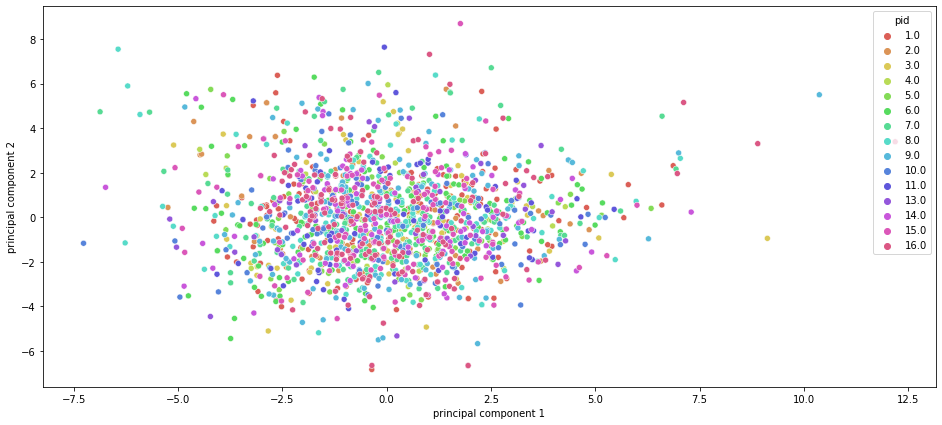

In [ ]:
plt.figure(figsize=(16,7))
sns.scatterplot(x='principal component 1',y='principal component 2',hue='pid',palette=sns.color_palette("hls",15),data=principalDf,
               legend="full")

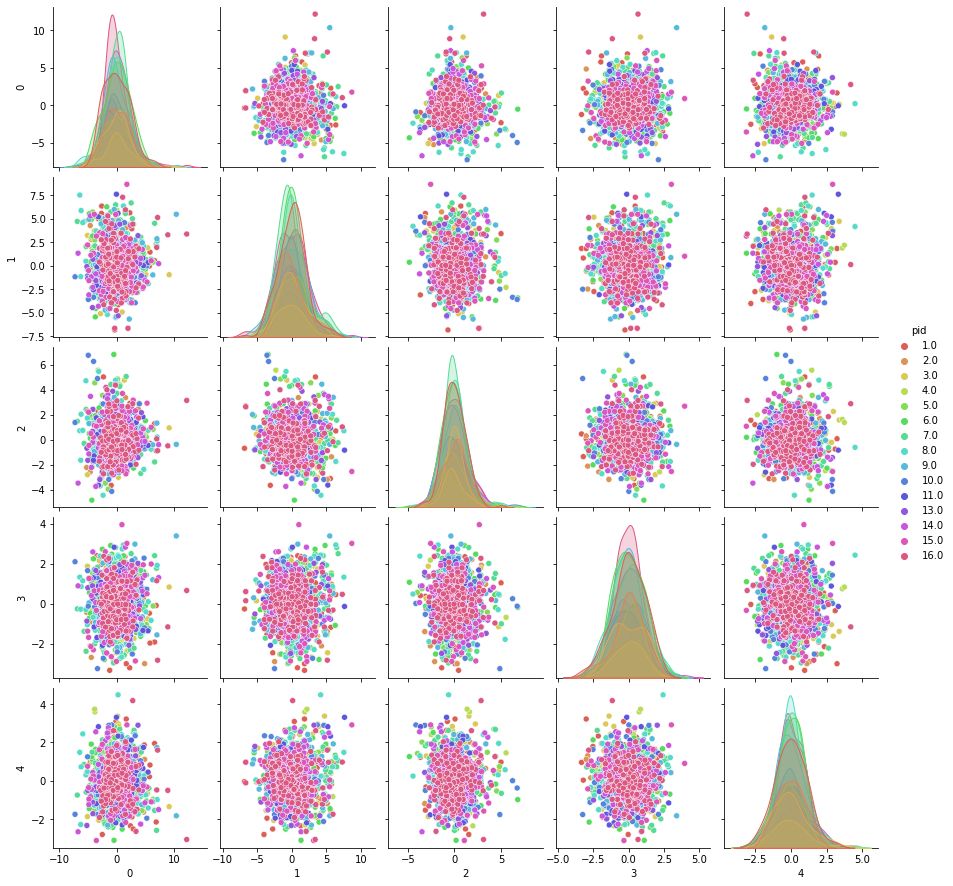

In [ ]:
sns.pairplot(principalDf,hue='pid',palette=sns.color_palette("hls",15))

##newest File

In [ ]:
df_day = pd.read_csv('/content/drive/MyDrive/sample4.csv.txt')
# df_day.dateTime =pd.to_datetime(df_day1.dateTime)
display(df_day.head(10))
df_day = df_day.drop(columns=['resthr','minutes_to_fall_asleep'])


survey_fatigue  survey_mood  ...  rem_sleep_minutes  pid
0             2.0          3.0  ...               83.0    1
1             3.0          3.0  ...               51.0    1
2             3.0          3.0  ...               35.0    1
3             3.0          3.0  ...               39.0    1
4             3.0          3.0  ...               38.0    1
5             3.0          3.0  ...               28.0    1
6             3.0          3.0  ...               28.0    1
7             3.0          3.0  ...               28.0    1
8             3.0          3.0  ...               28.0    1
9             3.0          3.0  ...               82.0    1

[10 rows x 39 columns]

###Pre-process and PCA testing

In [ ]:

names = list(df_day.columns)
names.remove('pid')
labels = ['pid']
print(np.where(pd.isnull(df_day)))
print(np.where(pd.isna(df_day)))
df_day = df_day.fillna(0)
display(df_day.loc[1160:1164,:])
x = df_day.loc[:, names].values# Separating out the target
y = df_day.loc[:,labels].values# Standardizing the features

pca = SparsePCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)#, columns = ['principal component 1', 'principal component 2', 'principal component 2', 'principal component 2', 'principal component 2'])

principalDf['pid'] = df_day['pid']
display(principalDf.head(10))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


survey_fatigue  survey_mood  ...  rem_sleep_minutes  pid
1160             3.0          3.0  ...              124.0   11
1161             3.0          2.0  ...              101.0   13
1162             3.0          4.0  ...               72.0   13
1163             2.0          3.0  ...              105.0   13
1164             3.0          3.0  ...               84.0   13

[5 rows x 39 columns]

0           1           2           3           4  pid
0  119708.959285 -159.694188  310.738992  -19.936372   55.976508    1
1  206452.265540   43.637328  412.634972  -13.923838  -13.234602    1
2  -51104.184392 -343.686220  332.529919  -61.762321   39.558916    1
3  429620.209494 -650.724344  293.479611 -125.369906   44.175191    1
4 -282614.351638 -458.425742  428.998276 -124.586278   75.436147    1
5 -230472.343670 -542.380407  334.023259 -140.685044  105.442295    1
6 -230472.343670 -542.380407  334.023259 -140.685044  105.442295    1
7 -230472.343670 -542.380407  334.023259 -140.685044  105.442295    1
8 -230472.343670 -542.380407  334.023259 -140.685044  105.442295    1
9   98342.220367 -135.946411  437.021011  -73.008934   61.750150    1

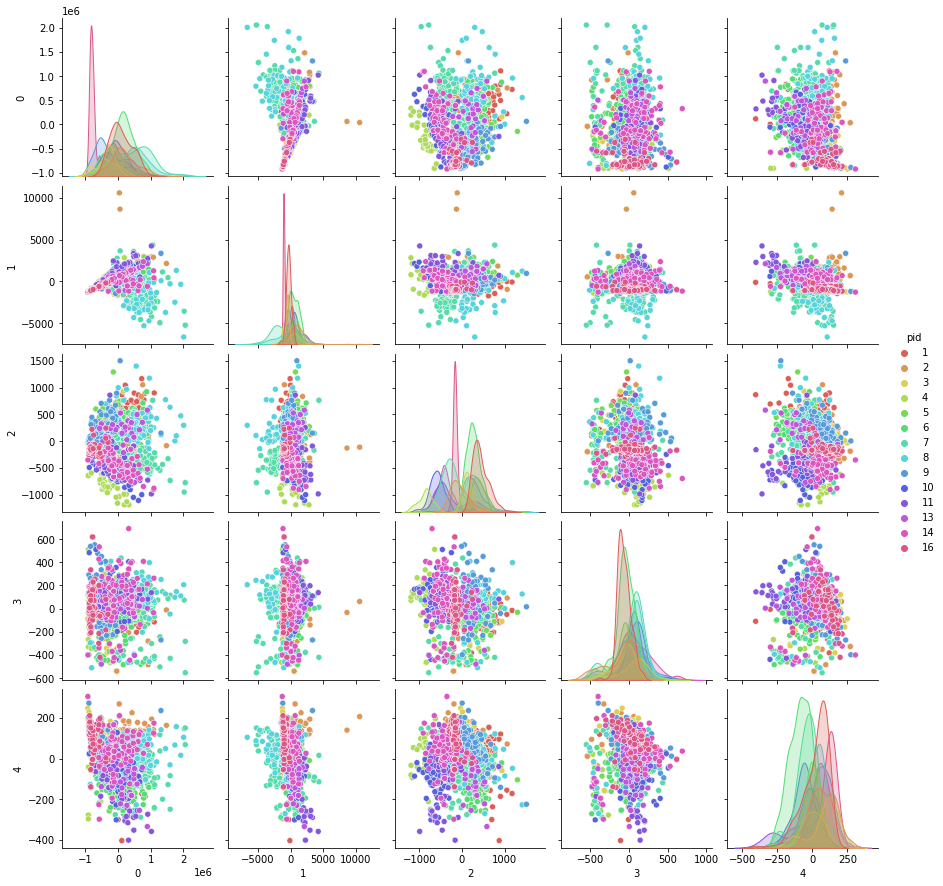

In [ ]:
# principalDf.pid.unique()
sns.pairplot(principalDf,hue='pid',palette=sns.color_palette("hls",14))

0         1         2         3         4  pid
0  1.036195 -0.277252 -1.493593  0.305166 -1.273270    1
1  2.169109  0.601954  0.408679 -1.529395  0.319157    1
2  0.986447 -1.431338  1.047546 -1.772483  0.612106    1
3 -0.426068  1.907982  1.894486 -1.801560 -1.042332    1
4 -2.643112 -2.875288 -0.261241 -0.705664  2.207281    1
5  0.090431 -2.033714  2.634500 -1.463418  0.120369    1
6  0.090431 -2.033714  2.634500 -1.463418  0.120369    1
7  0.090431 -2.033714  2.634500 -1.463418  0.120369    1
8  0.090431 -2.033714  2.634500 -1.463418  0.120369    1
9 -1.873131 -0.075509 -2.130363 -1.434972  1.154738    1

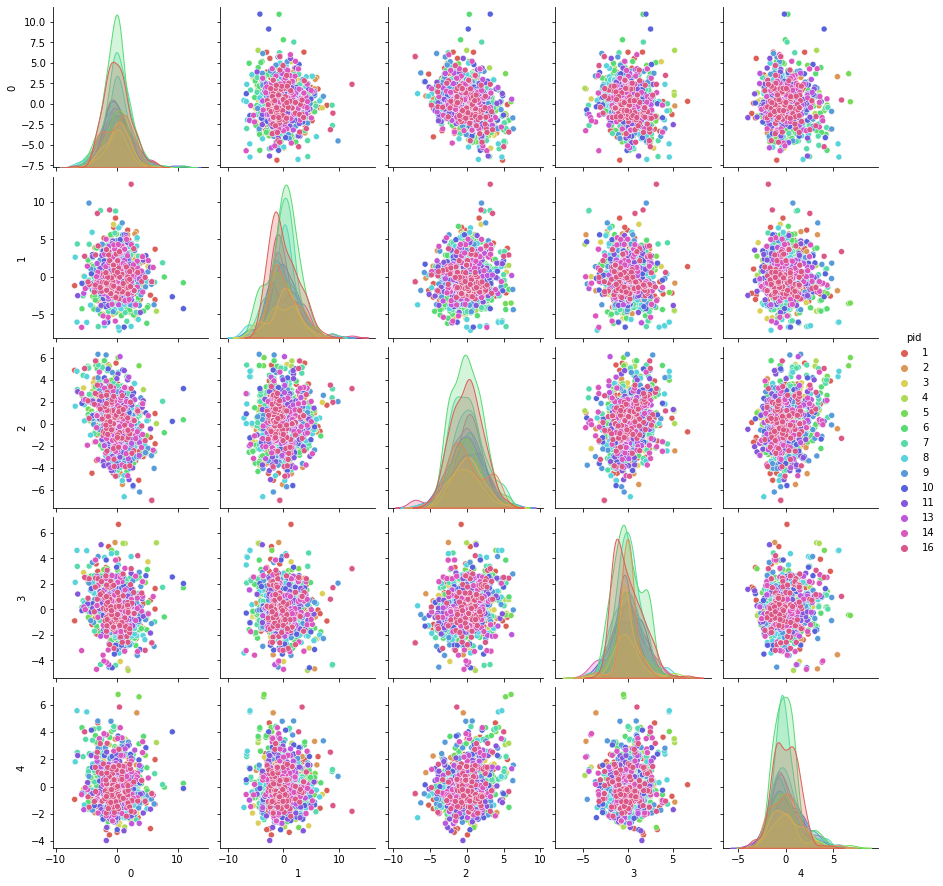

In [ ]:
df_day1 = df_day.copy()
df_day = df_day.fillna(0)
names = list(df_day.columns)

names.remove('pid')
labels = ['pid']

for i in names:
  df_day1[i] = df_day1.groupby('pid')[i].apply(lambda x: (x-x.mean())/(x.std()))
x = df_day1.loc[:, names].values# Separating out the target
y = df_day1.loc[:,labels].values# Standardizing the features

pca = SparsePCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)#, columns = ['principal component 1', 'principal component 2', 'principal component 2', 'principal component 2', 'principal component 2'])

principalDf['pid'] = df_day['pid']
display(principalDf.head(10))
sns.pairplot(principalDf,hue='pid',palette=sns.color_palette("hls",14))

[22.8 39.8 50.1 57.5 62.6 66.9 70.4 73.7 76.8 79.5 82.  84.2 86.3 88.2
 89.9 91.5 92.7 93.9 94.9 95.8 96.7 97.4 98.1 98.5 98.9]


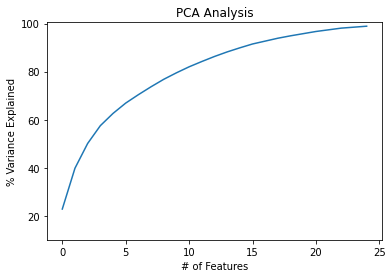

<Figure size 1152x504 with 0 Axes>

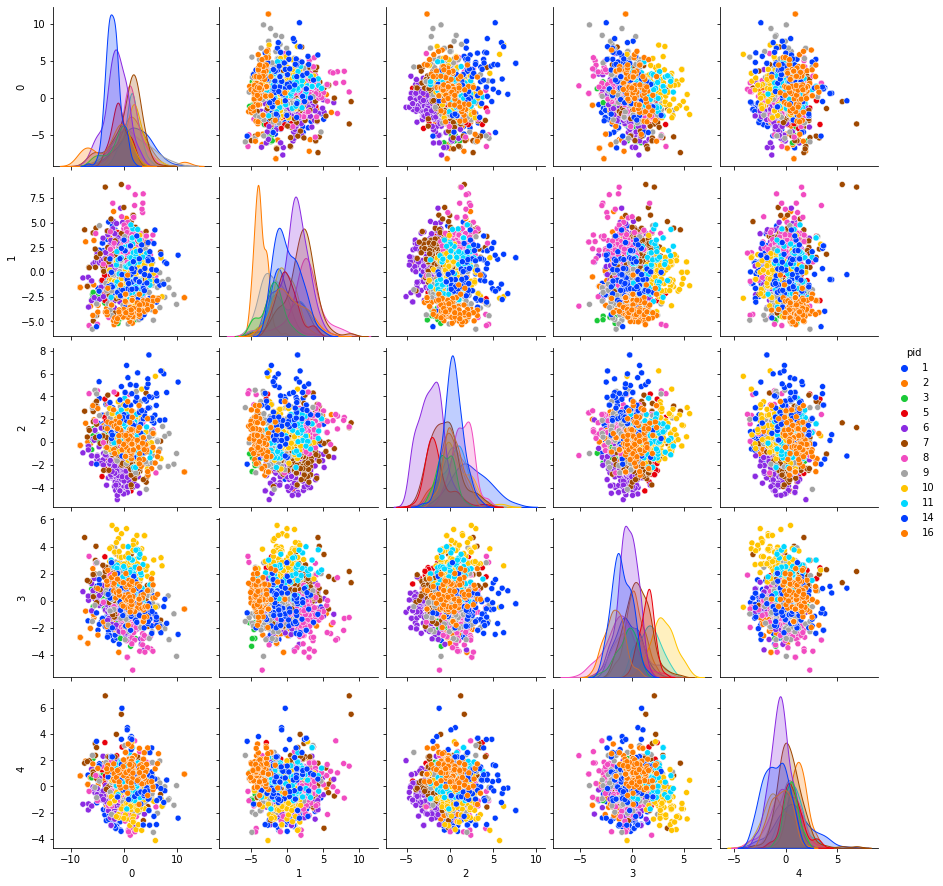

In [ ]:
df_day1 = df_day.copy()
names = list(df_day.columns)
names.remove('pid')
labels = ['pid']
df_day1 = df_day1[df_day1.pid != 12]
df_day1 = df_day1[df_day1.pid != 4]
df_day1 = df_day1[df_day1.pid != 13]
df_day1 = df_day1[df_day1.pid != 15]
df_day1 = df_day1.dropna(how='all', axis=0).dropna(thresh=len(df_day1.columns)-4, axis=0)

x = df_day1.loc[:, names].values# Separating out the target
y = df_day1.loc[:,labels].values# Standardizing the features
x = StandardScaler().fit_transform(x)
# pca = SparsePCA(n_components=5)
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(x)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(var)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(10,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)#, columns = ['principal component 1', 'principal component 2', 'principal component 2', 'principal component 2', 'principal component 2'])
principalDf['pid'] = y

plt.figure(figsize=(16,7))
sns.pairplot(principalDf,hue='pid',palette=sns.color_palette("bright",12))

<Figure size 1152x504 with 0 Axes>

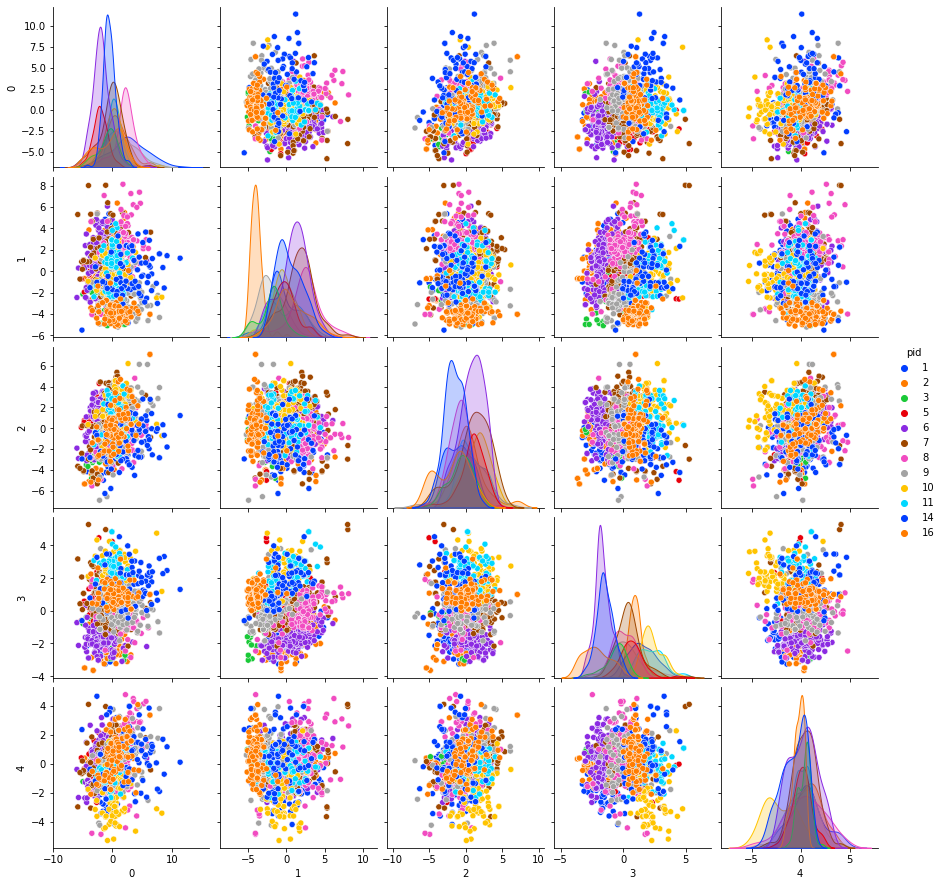

In [ ]:
pca = SparsePCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)#, columns = ['principal component 1', 'principal component 2', 'principal component 2', 'principal component 2', 'principal component 2'])

principalDf['pid'] = y

plt.figure(figsize=(16,7))
sns.pairplot(principalDf,hue='pid',palette=sns.color_palette("bright",12))

###Heatmap of correlations

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
corre = df_day1.corr()
corre_plt = corre.drop(columns=['pid'])
plt.figure(figsize=(20,15), dpi = 500)
cmap = LinearSegmentedColormap.from_list('RedGreen',  ['lime', 'white', 'red'])
b = sns.heatmap(corre_plt, cmap=cmap, xticklabels=corre.columns,yticklabels=corre.columns,  vmin=-1, vmax=1, cbar_kws={"aspect": 40})#,annot=True)
plt.xticks(rotation=45, size = 14, ha="right") 
plt.yticks(size = 14)
plt.tight_layout()
plt.savefig('proj_45.png', bbox_inches='tight')
files.download('proj_45.png') 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

testing reducing columns before PCA.
reducing columns that have less than 7 correlation of 0.5 with other columns

survey_fatigue 1
survey_mood 1
survey_readiness 1
survey_sleep_quality 1
survey_soreness 1
survey_stress 1
laminutes 4
maminutes 3
vaminutes 6
sedminutes 5
sleep_duration 9
minutes_asleep 9
minutes_woken_up 8
minutes_after_wakeup 1
time_in_bed 9
overall_score 8
composition_score 5
revitalization_score 2
duration_score 7
restlessness 1
hr_max 6
hr_min 4
hr_mean 4
hr_median 4
hr_std 6
total_calories 9
total_distance 7
total_steps 9
deep_sleep_count 2
deep_sleep_minutes 5
wake_sleep_count 9
wake_sleep_minutes 7
light_sleep_count 8
light_sleep_minutes 9
rem_sleep_count 6
rem_sleep_minutes 5
pid 4
13 (37, 37)
['sleep_duration', 'minutes_asleep', 'minutes_woken_up', 'time_in_bed', 'overall_score', 'duration_score', 'total_calories', 'total_distance', 'total_steps', 'wake_sleep_count', 'wake_sleep_minutes', 'light_sleep_count', 'light_sleep_minutes', 'pid']
____________________________________
(1308, 37) (1308, 14)
sleep_duration 9
minutes_asleep 9
minutes_woken_up 8
time_in_bed 9
overall_sco

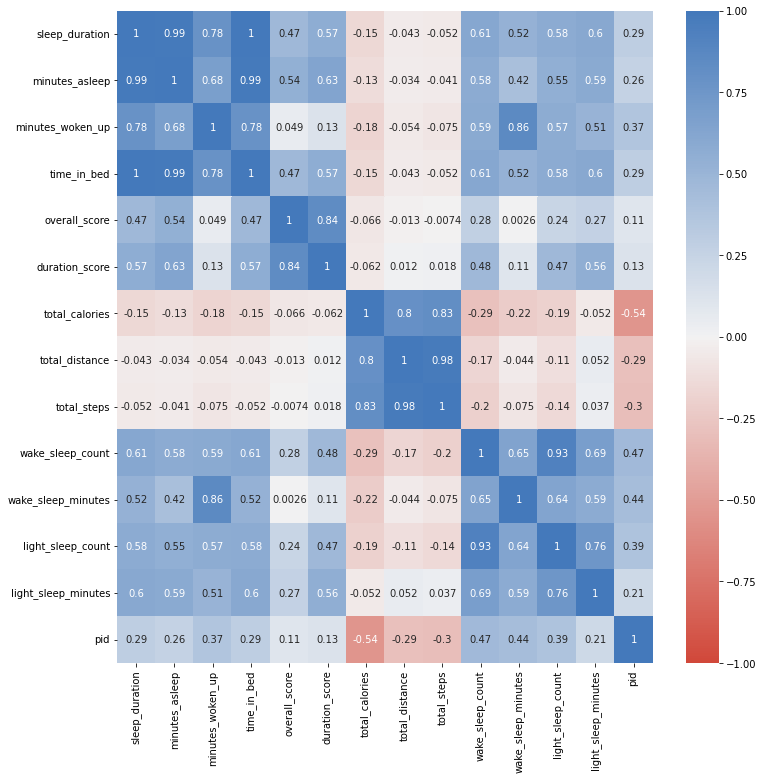

In [ ]:
corre = df_day1.corr()
corre1 = corre.abs()
# print(corre)
# print(corre1)
listname=[]
sizes= 0
count = corre1[corre1 > 0.5].count()
for index, value in count.items():
  print(index, value)
  if value > 6:
    listname.append(index)
    sizes +=1
listname.append('pid')
print(sizes, corre1.shape)
print(listname)
print("____________________________________")
test = df_day1.drop(columns=[col for col in df_day1 if col not in listname])
print(df_day1.shape, test.shape)
corre = test.corr()
corre1 = corre.abs()
# print(corre)
# print(corre1)
# listname=[]
sizes= 0
count = corre1[corre1 > 0.5].count()
for index, value in count.items():
  print(index, value)
  # if value > 6:
  #   listname.append(index)
  #   sizes +=1
plt.figure(figsize=(12,12))
cmap=sns.diverging_palette(15, 250, l=50, as_cmap=True)
sns.heatmap(corre, cmap=cmap,
        xticklabels=corre.columns,
        yticklabels=corre.columns,  vmin=-1, vmax=1,annot=True)

[46.5 67.2 79.9 87.4 92.6 95.2 97.4 98.5 99.1 99.5]


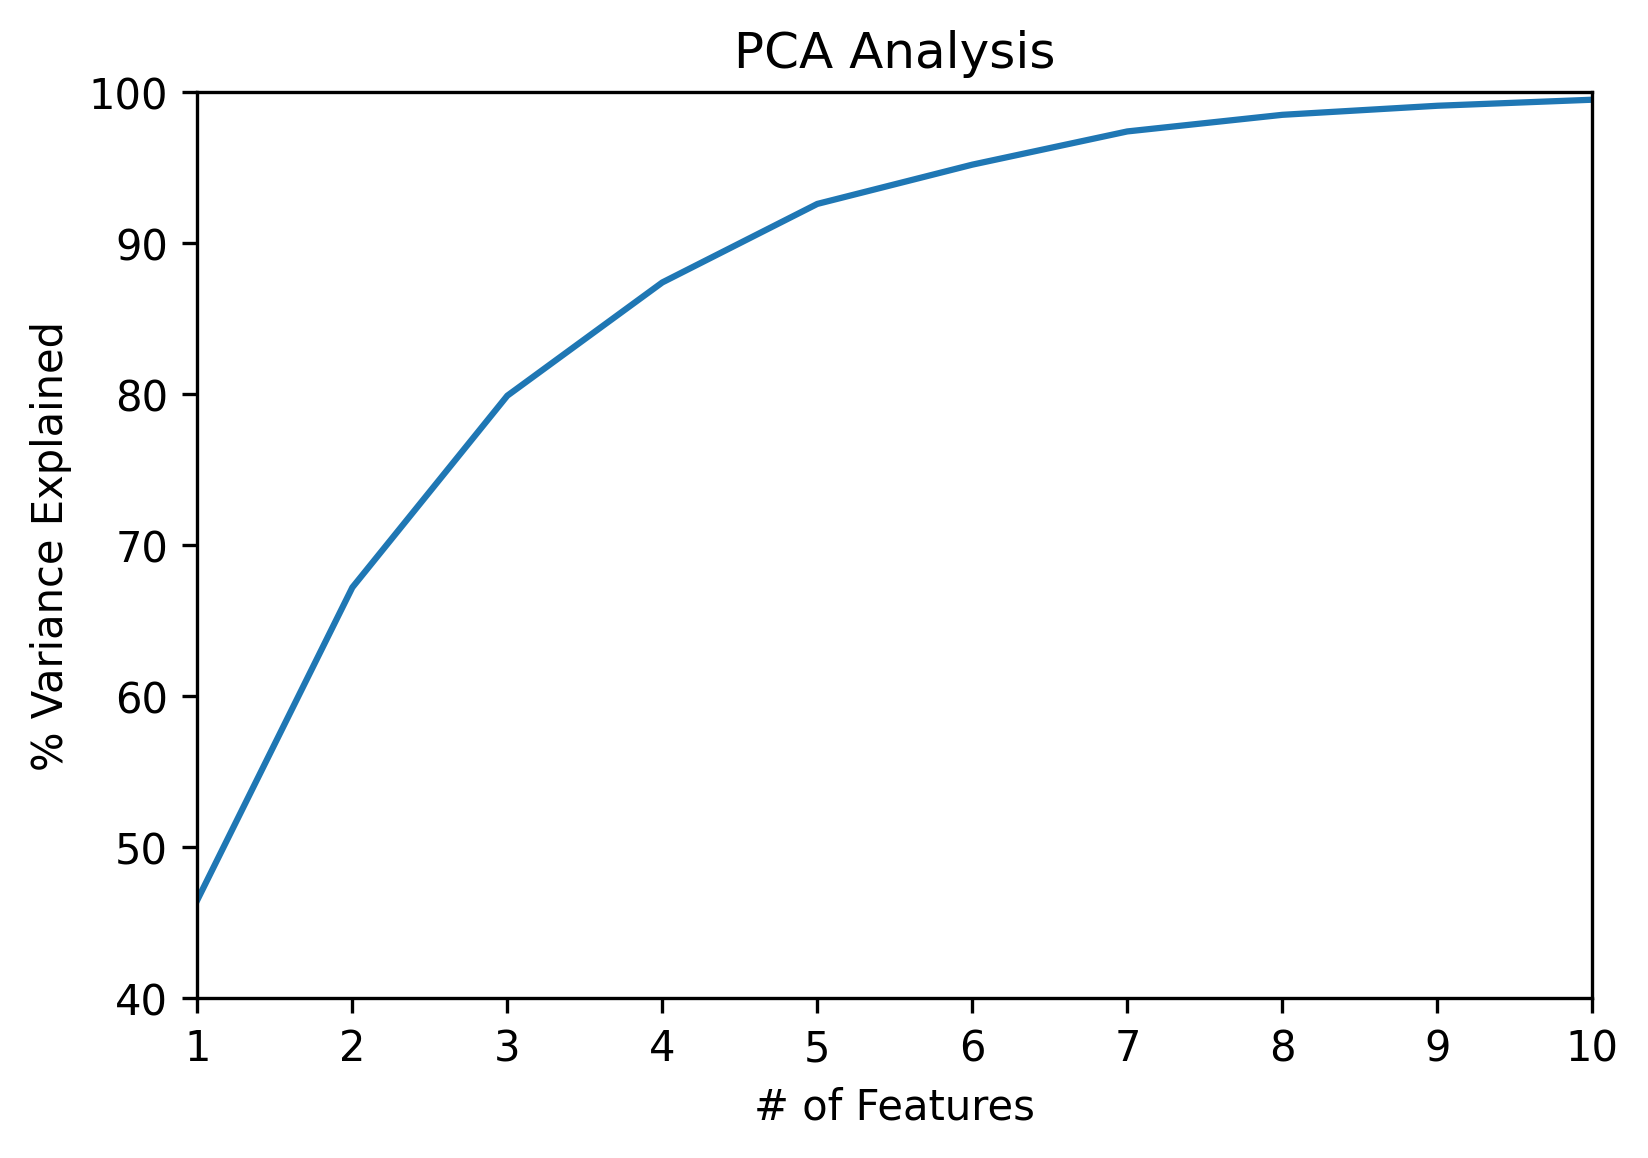

In [ ]:
#print(test.shape)
#x = test.loc[:, listname].values# Separating out the target
#y = test.loc[:,labels].values# Standardizing the features
#x = StandardScaler().fit_transform(x)
#pca = PCA(n_components=10)
#principalComponents = pca.fit_transform(x)
#principalDf = pd.DataFrame(data = principalComponents)#, columns = ['principal component 1', 'principal component 2', 'principal component 2', 'principal component 2', 'principal component 2'])

#principalDf['pid'] = y
#var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
#print(var)
#plt.figure(figsize=(16,7))
#sns.pairplot(principalDf,hue='pid',palette=sns.color_palette("bright",12))


#pca = SparsePCA(n_components=5)
#principalComponents = pca.fit_transform(x)
#principalDf = pd.DataFrame(data = principalComponents)#, columns = ['principal component 1', 'principal component 2', 'principal component 2', 'principal component 2', 'principal component 2'])

#principalDf['pid'] = y
# var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
# print(var)
#plt.figure(figsize=(16,7))
#sns.pairplot(principalDf,hue='pid',palette=sns.color_palette("bright",12))
print(var)
#a = [46.5, 67.2, 79.9, 87.4, 92.6]
#y = [1,2,3,4,5]
plt.figure(dpi = 300)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
#plt.ylim(10,100.5)
plt.axis([1, 10, 40, 100])
plt.xticks(range(1,11))
#plt.xlim(1,5)
plt.style.context('seaborn-whitegrid')
plt.plot(range(1,11),var)

In [ ]:
corre = df_day1.corr()
corre1 = corre.abs()
# print(corre)
# print(corre1)
listname=[]
sizes= 0
count = corre1[corre1 > 0.2].count()
for index, value in count.items():
  print(index, value)
  if value > 6:
    listname.append(index)
    sizes +=1
listname.append('pid')
print(sizes, corre1.shape)
print(listname)
print("____________________________________")
test = df_day1.drop(columns=[col for col in df_day1 if col not in listname])
print(df_day1.shape, test.shape)
corre = test.corr()
corre1 = corre.abs()
# print(corre)
# print(corre1)
# listname=[]
sizes= 0
count = corre1[corre1 > 0.5].count()
for index, value in count.items():
  print(index, value)
  # if value > 6:
  #   listname.append(index)
  #   sizes +=1
x = test.loc[:, listname].values# Separating out the target
y = test.loc[:,labels].values# Standardizing the features
# x = StandardScaler().fit_transform(x)
# pca = PCA(n_components=5)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents)#, columns = ['principal component 1', 'principal component 2', 'principal component 2', 'principal component 2', 'principal component 2'])

# principalDf['pid'] = y
# var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
# print(var)
# plt.figure(figsize=(16,7))
# sns.pairplot(principalDf,hue='pid',palette=sns.color_palette("bright",12))

survey_fatigue 6
survey_mood 7
survey_readiness 5
survey_sleep_quality 14
survey_soreness 2
survey_stress 4
laminutes 15
maminutes 10
vaminutes 12
sedminutes 23
sleep_duration 18
minutes_asleep 18
minutes_woken_up 15
minutes_after_wakeup 1
time_in_bed 18
overall_score 17
composition_score 11
revitalization_score 6
duration_score 15
restlessness 14
hr_max 11
hr_min 15
hr_mean 14
hr_median 9
hr_std 10
total_calories 18
total_distance 13
total_steps 13
deep_sleep_count 17
deep_sleep_minutes 20
wake_sleep_count 23
wake_sleep_minutes 18
light_sleep_count 18
light_sleep_minutes 15
rem_sleep_count 22
rem_sleep_minutes 13
pid 21
31 (37, 37)
['survey_mood', 'survey_sleep_quality', 'laminutes', 'maminutes', 'vaminutes', 'sedminutes', 'sleep_duration', 'minutes_asleep', 'minutes_woken_up', 'time_in_bed', 'overall_score', 'composition_score', 'duration_score', 'restlessness', 'hr_max', 'hr_min', 'hr_mean', 'hr_median', 'hr_std', 'total_calories', 'total_distance', 'total_steps', 'deep_sleep_count'

Testing removing survey values

(1308, 37) (1308, 12)
[24.4 40.8 52.7 62.5 71. ]


<Figure size 1152x504 with 0 Axes>

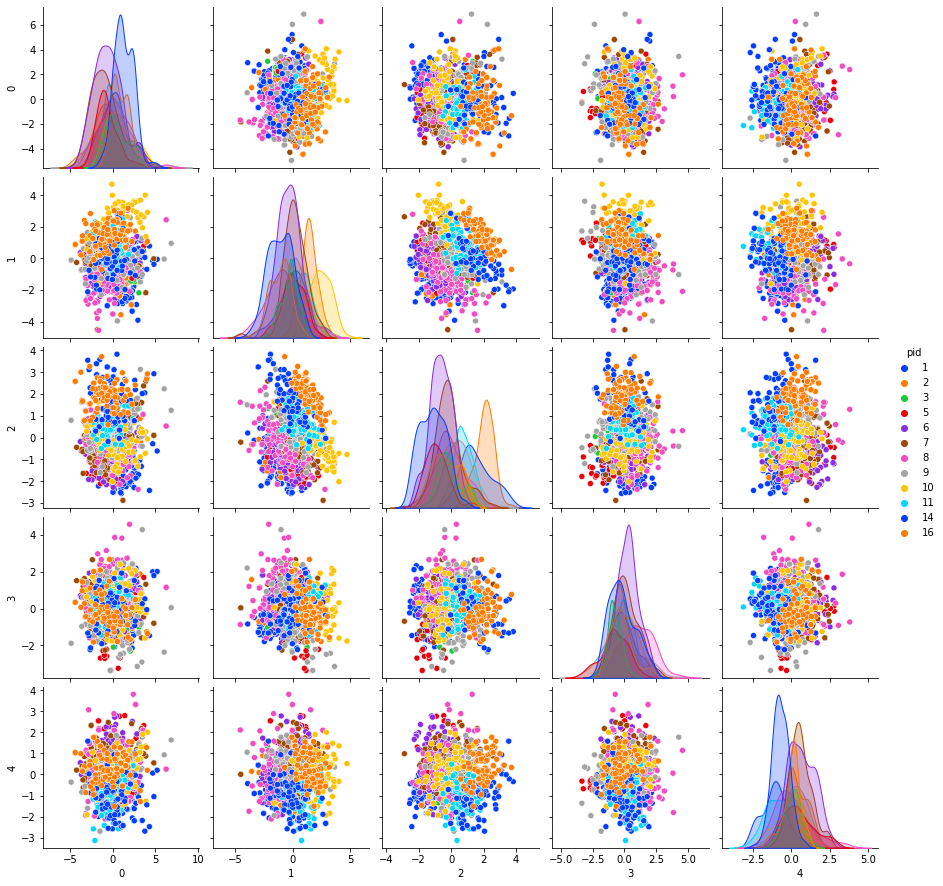

In [ ]:

listname=['composition_score','duration_score','overall_score','pid','revitalization_score','survey_fatigue','survey_mood','survey_readiness','survey_sleep_quality','survey_soreness','survey_stress','total_calories']

test = df_day1.drop(columns=[col for col in df_day1 if col not in listname])
print(df_day1.shape, test.shape)

x = test.loc[:, listname].values# Separating out the target
y = test.loc[:,labels].values# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)#, columns = ['principal component 1', 'principal component 2', 'principal component 2', 'principal component 2', 'principal component 2'])

principalDf['pid'] = y
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(var)
plt.figure(figsize=(16,7))
sns.pairplot(principalDf,hue='pid',palette=sns.color_palette("bright",12))